## Data visualization

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

### Importing dataset

 Our model performance worked best with the top ten feature data set.
 So we are visualizing that data set here.

In [2]:
dataset = pd.read_csv('top10andprice.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
dataset.head()

,TotRmsAbvGrd,YearBuilt,LandContour,BsmtFinSF1,GarageCars,1stFlrSF,TotalBsmtSF,2ndFlrSF,GrLivArea,OverallQual,Saleprice
0,8,2003,Lvl,706,2,856,856,854,1710,7,208500
1,6,1976,Lvl,978,2,1262,1262,0,1262,6,181500
2,6,2001,Lvl,486,2,920,920,866,1786,7,223500
3,7,1915,Lvl,216,3,961,756,756,1717,7,140000
4,9,2000,Lvl,655,3,1145,1145,1053,2198,8,250000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TotRmsAbvGrd  1460 non-null   int64 
 1   YearBuilt     1460 non-null   int64 
 2   LandContour   1460 non-null   object
 3   BsmtFinSF1    1460 non-null   int64 
 4   GarageCars    1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   TotalBsmtSF   1460 non-null   int64 
 7   2ndFlrSF      1460 non-null   int64 
 8   GrLivArea     1460 non-null   int64 
 9   OverallQual   1460 non-null   int64 
 10  Saleprice     1460 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 125.6+ KB


In [4]:
dataset.describe()

,TotRmsAbvGrd,YearBuilt,BsmtFinSF1,GarageCars,1stFlrSF,TotalBsmtSF,2ndFlrSF,GrLivArea,OverallQual,Saleprice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.517808,1971.267808,443.639726,1.767123,1162.626712,1057.429452,346.992466,1515.463699,6.099315,180921.195890
std,1.625393,30.202904,456.098091,0.747315,386.587738,438.705324,436.528436,525.480383,1.382997,79442.502883
min,2.000000,1872.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,1.000000,34900.000000
25%,5.000000,1954.000000,0.000000,1.000000,882.000000,795.750000,0.000000,1129.500000,5.000000,129975.000000
50%,6.000000,1973.000000,383.500000,2.000000,1087.000000,991.500000,0.000000,1464.000000,6.000000,163000.000000
75%,7.000000,2000.000000,712.250000,2.000000,1391.250000,1298.250000,728.000000,1776.750000,7.000000,214000.000000
max,14.000000,2010.000000,5644.000000,4.000000,4692.000000,6110.000000,2065.000000,5642.000000,10.000000,755000.000000


### Visualizing the distribution of the numerical features, and the relationship with with saleprice

In [5]:
num_candidates = [column for column in X.columns if X[column].dtype != object]
len(num_candidates)

9

In the scatter plots we can see that there is a logarithmic relationship between sales price and the numerical features

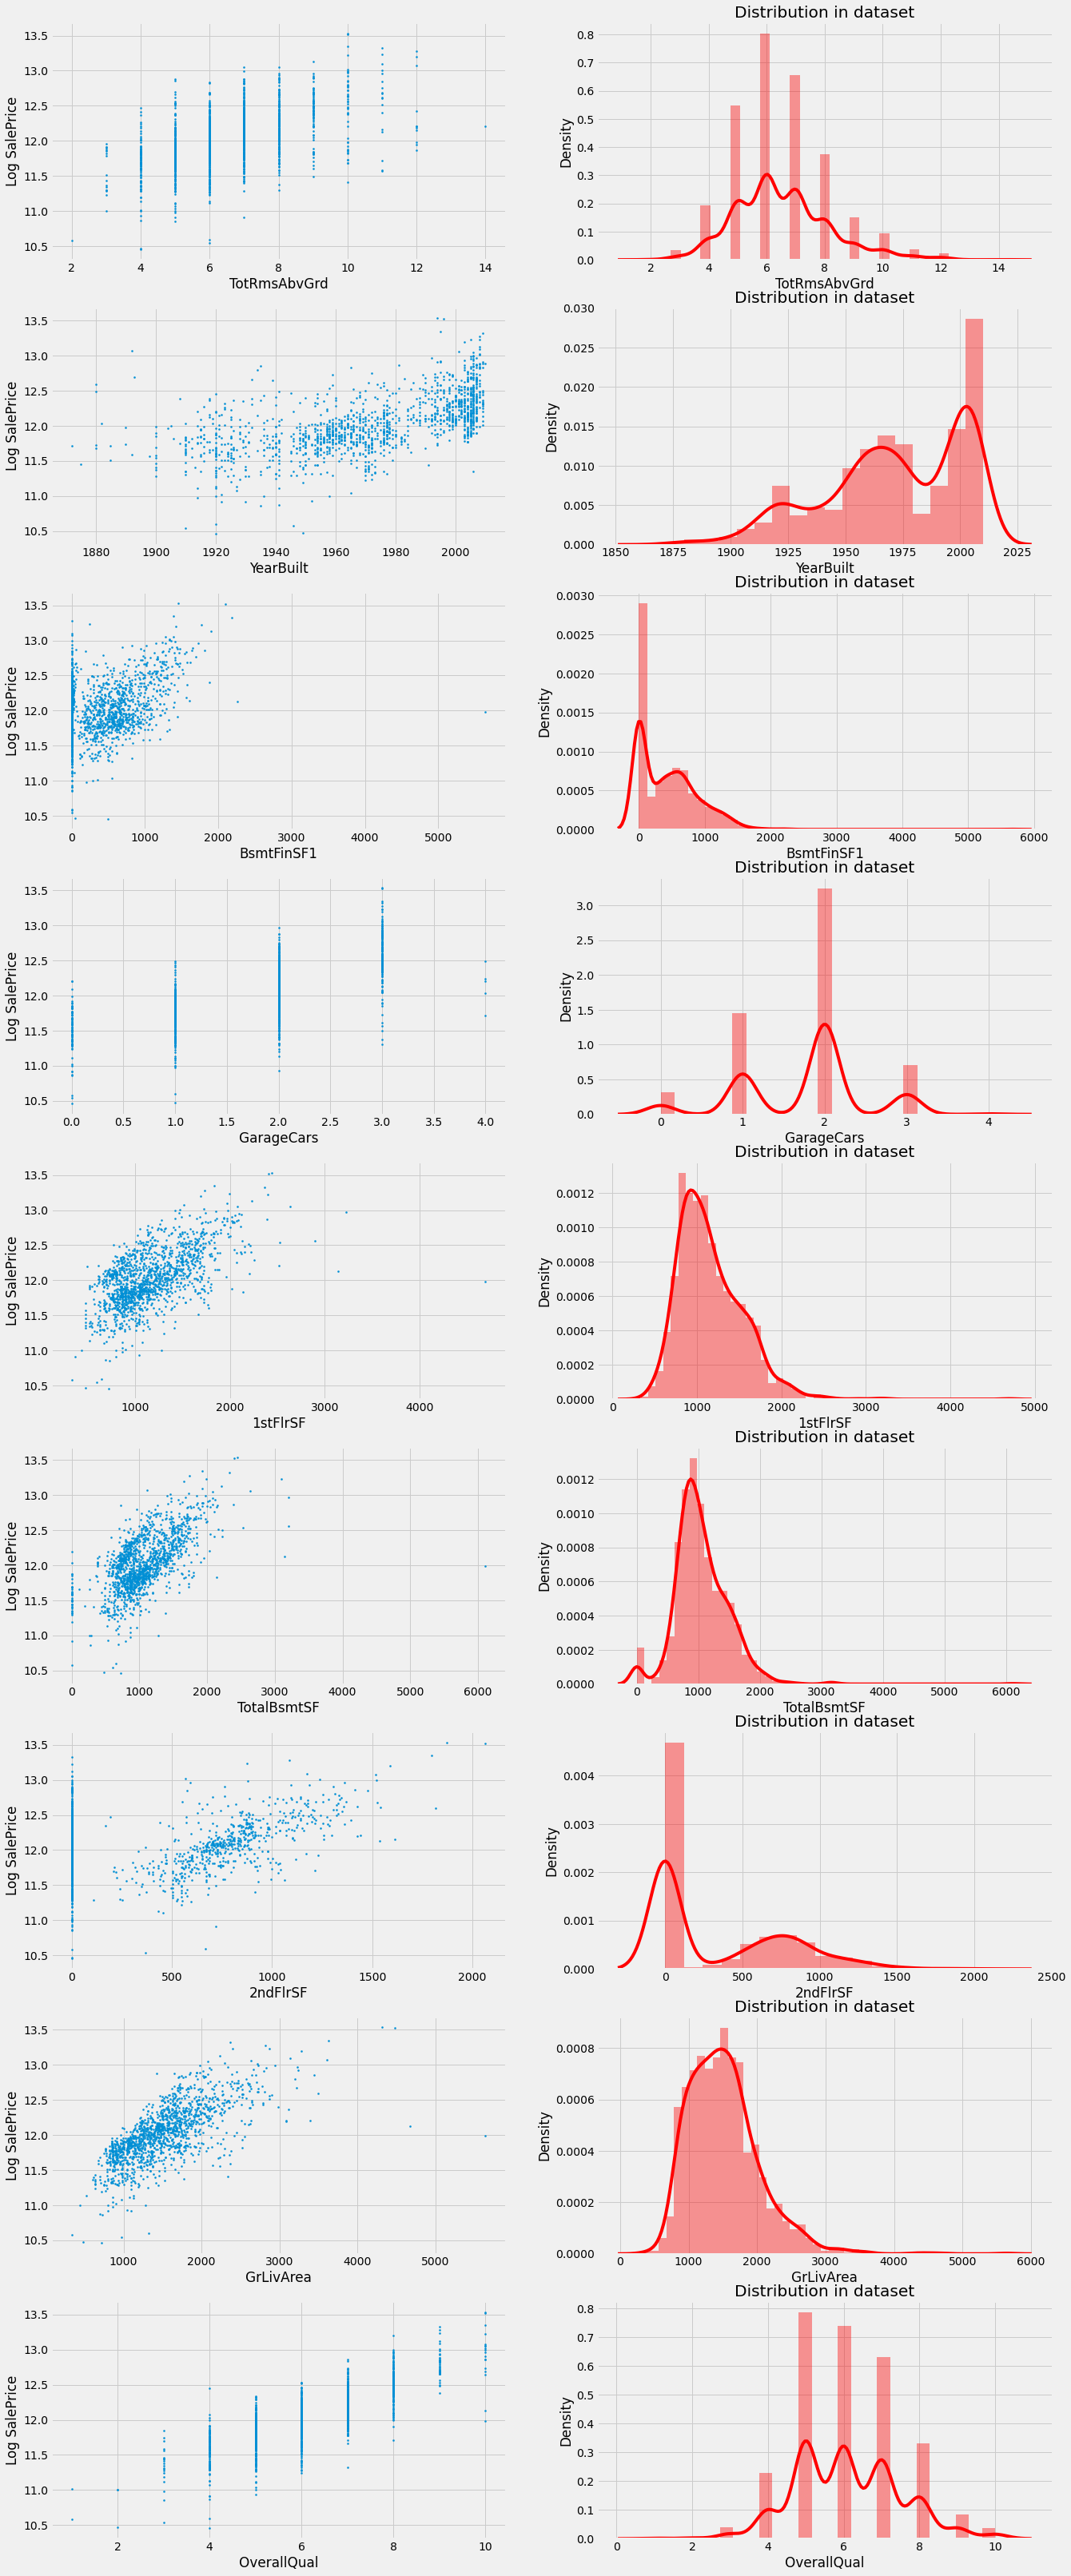

In [6]:

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(len(num_candidates),2,figsize=(20,len(num_candidates)*6))

for n in range(len(num_candidates)):
    feat = num_candidates[n]
    ax[n,0].scatter(dataset[feat].values, np.log(dataset.Saleprice.values), s=4)
    ax[n,0].set_ylabel("Log SalePrice")
    ax[n,0].set_xlabel(feat);
    sns.distplot(dataset[feat].dropna(), kde=True, ax=ax[n,1], color="red")
    ax[n,1].set_title("Distribution in dataset")

### One categorical feature

In [7]:
categorical_columns = [column for column in X.columns if X[column].dtype == object]
len(categorical_columns)

1

LandContour: Flatness of the property

        Lvl	Near Flat/Level	
        Bnk	Banked - Quick and significant rise from street grade to building
        HLS	Hillside - Significant slope from side to side
        Low	Depression

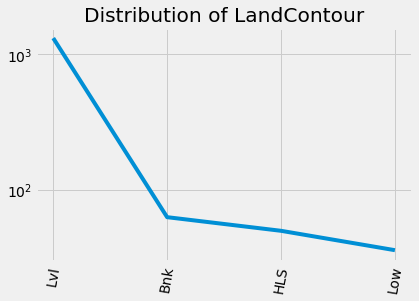

In [8]:
plt.style.use('fivethirtyeight')
plt.title('Distribution of LandContour')
plt.plot(dataset['LandContour'].value_counts())
plt.yscale('log')
plt.tick_params(axis='x', rotation=80)
plt.show()